# Linear Regression

# Using Students' Information To Predict Their Final GPA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
org = pd.read_csv('student-data-org.csv')
mat =pd.read_csv('student-data-mat.csv')

In [3]:
studentData=pd.concat([org,mat])
# studentData=pd.read_csv('student03.csv')

In [4]:
studentData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,Internal Marks,End Sem. Marks,Final GPA,Final Grade
0,GP,F,23,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,33,5.5,poor
1,GP,F,22,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,18,33,5.5,poor
2,GP,F,20,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,24,39,6.0,fair
3,GP,F,20,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,28,42,7.0,fair
4,GP,F,21,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,22,39,6.5,fair


In [5]:
studentData.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'Internal Marks', 'End Sem. Marks',
       'Final GPA', 'Final Grade'],
      dtype='object')

In [6]:
studentData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school          1044 non-null   object 
 1   sex             1044 non-null   object 
 2   age             1044 non-null   int64  
 3   address         1044 non-null   object 
 4   famsize         1044 non-null   object 
 5   Pstatus         1044 non-null   object 
 6   Medu            1044 non-null   int64  
 7   Fedu            1044 non-null   int64  
 8   Mjob            1044 non-null   object 
 9   Fjob            1044 non-null   object 
 10  reason          1044 non-null   object 
 11  guardian        1044 non-null   object 
 12  traveltime      1044 non-null   int64  
 13  studytime       1044 non-null   int64  
 14  failures        1044 non-null   int64  
 15  schoolsup       1044 non-null   object 
 16  famsup          1044 non-null   object 
 17  paid            1044 non-null   ob

In [7]:
studentData.isnull().any()

school            False
sex               False
age               False
address           False
famsize           False
Pstatus           False
Medu              False
Fedu              False
Mjob              False
Fjob              False
reason            False
guardian          False
traveltime        False
studytime         False
failures          False
schoolsup         False
famsup            False
paid              False
activities        False
nursery           False
higher            False
internet          False
romantic          False
famrel            False
freetime          False
goout             False
Dalc              False
Walc              False
health            False
absences          False
Internal Marks    False
End Sem. Marks    False
Final GPA         False
Final Grade       False
dtype: bool

# Yes,No Missing Values

In [8]:
# sex = pd.get_dummies(studentData['sex'],drop_first=True)
# school = pd.get_dummies(studentData['school'],drop_first=True) 
# address= pd.get_dummies(studentData['address'],drop_first=True)
# address= pd.get_dummies(studentData['address'],drop_first=True)


In [9]:
studentdata=pd.get_dummies(studentData)
studentdata.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Final Grade_fair,Final Grade_good,Final Grade_poor
0,23,4,4,2,2,0,4,3,4,1,...,1,0,1,1,0,1,0,0,0,1
1,22,1,1,1,2,0,5,3,3,1,...,0,0,1,0,1,1,0,0,0,1
2,20,1,1,1,2,0,4,3,2,2,...,1,0,1,0,1,1,0,1,0,0
3,20,4,2,1,3,0,3,2,2,1,...,1,0,1,0,1,0,1,1,0,0
4,21,3,3,1,2,0,4,3,2,1,...,1,0,1,1,0,1,0,1,0,0


# Training a Linear Regression Model

In [10]:
X = studentData[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'Internal Marks', 'End Sem. Marks', 'Final Grade']]
y = studentData['Final GPA']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Creating and Training the Model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
print(lm.intercept_)

291082304588.7081


In [18]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-3.07474322e-02 -1.28930397e-02 -1.76834539e-02  8.16179213e-02
 -2.70290328e-02 -9.07720312e-02  5.60495097e-02 -8.77697028e-04
  1.40210233e-03 -3.01980373e-03  4.12921749e-02 -2.32348379e-02
  2.26262205e-02  2.70297174e-02  1.45361201e-01  6.92350544e+10
  6.92350544e+10  8.05769652e+10  8.05769652e+10  3.95708057e+07
  3.95708058e+07  1.70998620e+11  1.70998620e+11 -2.84082543e+10
 -2.84082543e+10  5.73497018e+10  5.73497018e+10  5.73497018e+10
  5.73497018e+10  5.73497018e+10  3.78130342e+10  3.78130342e+10
  3.78130342e+10  3.78130342e+10  3.78130342e+10 -7.00256198e+10
 -7.00256198e+10 -7.00256198e+10 -7.00256198e+10  1.21958966e+11
  1.21958966e+11  1.21958966e+11  2.99348970e+10  2.99348970e+10
  6.07911608e+10  6.07911608e+10  1.34700986e+10  1.34700986e+10
  9.86989650e+08  9.86989650e+08 -1.59063186e+11 -1.59063186e+11
 -1.14686078e+11 -1.14686078e+11 -5.11589734e+10 -5.11589734e+10
 -2.85168468e+11 -2.85168468e+11 -2.25726784e+11 -2.25726784e+11
 -2.25726

In [19]:
predictions = lm.predict(X_test)

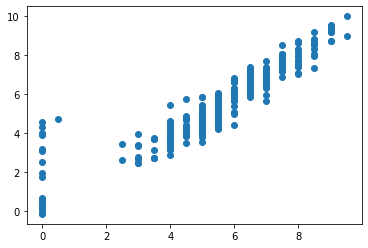

In [20]:
plt.scatter(y_test,predictions)

In [21]:
predictions

array([ 6.1829834 ,  6.21832275,  5.14086914,  7.86486816,  4.7354126 ,
        4.51031494,  6.86187744,  6.72546387,  4.5970459 ,  5.99157715,
        6.23754883,  5.95544434,  8.73303223,  7.3762207 ,  5.45098877,
        7.69421387,  9.19177246,  6.74707031,  4.04321289,  6.42999268,
        7.96697998,  9.33282471,  4.89599609,  6.12774658,  4.98150635,
        4.21008301,  3.54443359,  6.17858887,  4.25585938,  4.17901611,
        4.37426758,  5.03289795,  6.14031982,  5.4498291 ,  8.07305908,
        6.72875977,  8.77728271,  4.52020264,  7.5078125 ,  6.66949463,
        7.73681641,  6.61254883,  8.95983887,  4.60424805,  4.39587402,
        6.31103516,  5.97998047,  4.32910156,  7.05041504,  9.38812256,
        5.63641357,  3.69207764,  5.42004395,  6.84326172,  7.38348389,
        7.66894531,  5.05541992,  7.2590332 ,  4.74523926,  2.7744751 ,
        7.3762207 ,  3.93371582,  4.02722168,  6.85388184,  5.34240723,
        6.63433838,  4.30383301,  7.04711914,  4.98614502,  7.51

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


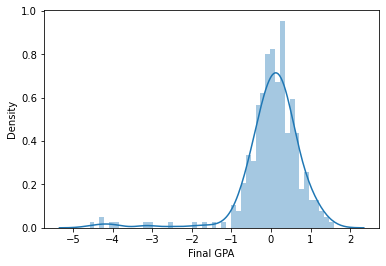

In [22]:
sns.distplot((y_test-predictions),bins=50);

In [23]:
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("Explain variance score =", round(metrics.explained_variance_score(y_test, predictions), 2)) 
print("R2 score =", round(metrics.r2_score(y_test, predictions), 2))

MAE: 0.4975710340366242
MSE: 0.642001902221874
RMSE: 0.8012502119949011
Explain variance score = 0.84
R2 score = 0.84


# Classification

# Using Students' Information To Predict Their Final Grade

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(studentData.drop('Final Grade',axis=1), 
                                                    studentData['Final Grade'], test_size=0.30, 
                                                    random_state=101)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

#  1.Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
log_predictions = logmodel.predict(X_test)

In [87]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

        fair       0.89      0.83      0.86       121
        good       0.78      0.80      0.79        35
        poor       0.92      0.97      0.94       158

    accuracy                           0.89       314
   macro avg       0.86      0.86      0.86       314
weighted avg       0.89      0.89      0.89       314



In [89]:
#calculating the classification accuracies
print("Training Accuracy:", logmodel.score(X_train,y_train))
print("Testing Accuracy:", logmodel.score(X_test,y_test))

Training Accuracy: 0.9465753424657535
Testing Accuracy: 0.8949044585987261


In [90]:
#printing confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,log_predictions)
print(cm)

[[100   8  13]
 [  7  28   0]
 [  5   0 153]]


In [92]:
# k fold cross validation 

#from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
#accuracies = cross_val_score(estimator = logmodel, X = X_train, y = y_train, cv = 20)
#print(accuracies)

# computing mean of accuaracies obtained by all the models
#print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
#print("mean standard variance :", accuracies.std())

# 2.Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
rf_predict = model.predict(X_test)
# calculating the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9904458598726115


In [94]:
#Printing confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rf_predict)
print(cm)

[[121   0   0]
 [  3  32   0]
 [  0   0 158]]


In [95]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

        fair       0.98      1.00      0.99       121
        good       1.00      0.91      0.96        35
        poor       1.00      1.00      1.00       158

    accuracy                           0.99       314
   macro avg       0.99      0.97      0.98       314
weighted avg       0.99      0.99      0.99       314



In [96]:
# k fold cross validation 

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())

[1.         1.         1.         0.97297297 0.97297297 0.97297297
 1.         0.97297297 1.         0.97297297 0.97222222 1.
 1.         1.         1.         0.97222222 0.94444444 1.
 1.         1.        ]
mean accuracy : 0.9876876876876877
mean standard variance : 0.01620195958782382


# 3.Decision Forest

In [97]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [98]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        fair       1.00      1.00      1.00       121
        good       1.00      1.00      1.00        35
        poor       1.00      1.00      1.00       158

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314



In [99]:
#Printing confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print(cm)

[[121   0   0]
 [  0  35   0]
 [  0   0 158]]


In [100]:
# k fold cross validation 

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean accuracy : 1.0
mean standard variance : 0.0


# 4.Support Vector Machine

In [101]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
svm_pred = model.predict(X_test)

# calculating the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.8931506849315068
Testing Accuracy : 0.9203821656050956


In [102]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

        fair       0.89      0.91      0.90       121
        good       0.96      0.74      0.84        35
        poor       0.94      0.97      0.95       158

    accuracy                           0.92       314
   macro avg       0.93      0.87      0.90       314
weighted avg       0.92      0.92      0.92       314



In [103]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# printing the confusion matrix
print(cm)

[[110   1  10]
 [  9  26   0]
 [  5   0 153]]


In [104]:
# k fold cross validation 

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())

[0.97297297 0.94594595 0.91891892 0.81081081 0.86486486 0.78378378
 0.94594595 0.91891892 0.86486486 0.72972973 0.88888889 0.86111111
 0.91666667 0.94444444 0.94444444 0.86111111 0.83333333 1.
 0.88888889 0.91666667]
mean accuracy : 0.8906156156156158
mean standard variance : 0.06467058653081567


# MODEL SELECTIONS

Lets Compare Performance of each Model

    1.Logistic Regression :->  Model Accuracy - 94 
                               Testing Accuracy - 89  

    2.Random Forest       :-> 
                                Model Accuracy - 1 
                                Testing Accuracy - 99

    3.Decision Forest     :->  
                                Model Accuracy - 1
                                Testing Accuracy - 1

    4.Support Vector Machine :->  
                                Model Accuracy - 89
                                Testing Accuracy - 92
                                
                                
        So Clearly Decision Forest is having more model accuracy and testing accuracy. 
        Therefore Decision Forest is best for this data set.
        

# SUMMARY

    The Students of college likely to have this profile
    
    - Is not in a romantic relatioship
    - Does not consume alcohol
    - Living in an urban area
    - Does not go out with friends frequently
    - Have strong desire of receiving higher education
    - Parents both received higher education
    - Study more than 10 hours weekly
    - Have access to internet at hoome
    - Is healthy
    - No absence in classes